In [1]:
# mkdir /home/obotvinnik/Dropbox/figures2/singlecell_pnm/figure4_voyages/

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

from anchor.visualize import MODALITY_TO_COLOR, MODALITY_ORDER, MODALITY_PALETTE
modality_order = MODALITY_ORDER

sns.set(style='ticks', context='talk', rc={'font.sans-serif':'Arial', 'pdf.fonttype': 42})

%matplotlib inline

%load_ext autoreload
%autoreload 2

folder = 'pdfs' #'/home/obotvinnik/Dropbox/figures2/singlecell_pnm/figure4_voyages'

import flotilla
study = flotilla.embark('singlecell_pnm_figure2_modalities_bayesian', 
                        flotilla_dir='/projects/ps-yeolab/obotvinnik/flotilla_projects/')
# study = flotilla.embark('singlecell_pnm_figure1_supplementary_post_splicing_filtering')

/home/obotvinnik/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:810: UserWarning: Found matplotlib configuration in ~/.matplotlib/. To conform with the XDG base directory standard, this configuration location has been deprecated on Linux, and the new location is now /home/obotvinnik/.config/matplotlib/. Please move your configuration there to ensure that matplotlib will continue to find it in the future.
  _get_xdg_config_dir())
/home/obotvinnik/anaconda/lib/python2.7/site-packages/flotilla/__init__.py:55: DtypeWarning: Columns (11,19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  load_species_data=load_species_data)


2016-04-27 16:12:43	Reading datapackage from /projects/ps-yeolab/obotvinnik/flotilla_projects/singlecell_pnm_figure2_modalities_bayesian/datapackage.json
2016-04-27 16:12:43	Parsing datapackage to create a Study object
2016-04-27 16:13:37	Initializing Study
2016-04-27 16:13:37	Initializing Predictor configuration manager for Study
2016-04-27 16:13:37	Predictor ExtraTreesClassifier is of type <class 'sklearn.ensemble.forest.ExtraTreesClassifier'>
2016-04-27 16:13:37	Added ExtraTreesClassifier to default predictors
2016-04-27 16:13:37	Predictor ExtraTreesRegressor is of type <class 'sklearn.ensemble.forest.ExtraTreesRegressor'>
2016-04-27 16:13:37	Added ExtraTreesRegressor to default predictors
2016-04-27 16:13:37	Predictor GradientBoostingClassifier is of type <class 'sklearn.ensemble.gradient_boosting.GradientBoostingClassifier'>
2016-04-27 16:13:37	Added GradientBoostingClassifier to default predictors
2016-04-27 16:13:37	Predictor GradientBoostingRegressor is of type <class 'sklearn.

In [2]:
mkdir $folder

mkdir: cannot create directory `pdfs': File exists


In [3]:
modality_transitions = study.supplemental.modalities_tidy.merge(
    study.supplemental.modalities_tidy, left_on='event_id', right_on='event_id')
modality_transitions.head()

,phenotype_x,event_id,modality_x,phenotype_y,modality_y
0,MN,exon:chr10:102114184-102114389:+@exon:chr10:10...,included,MN,included
1,MN,exon:chr10:102114184-102114389:+@exon:chr10:10...,included,NPC,included
2,MN,exon:chr10:102114184-102114389:+@exon:chr10:10...,included,iPSC,included
3,NPC,exon:chr10:102114184-102114389:+@exon:chr10:10...,included,MN,included
4,NPC,exon:chr10:102114184-102114389:+@exon:chr10:10...,included,NPC,included


In [4]:
rows = (modality_transitions.phenotype_x == 'iPSC') & (modality_transitions.phenotype_y == 'MN')
ipsc_mn_modalities = modality_transitions.loc[rows]
ipsc_mn_modalities.head()

,phenotype_x,event_id,modality_x,phenotype_y,modality_y
6,iPSC,exon:chr10:102114184-102114389:+@exon:chr10:10...,included,MN,included
15,iPSC,exon:chr10:102286732-102286831:-@exon:chr10:10...,included,MN,included
24,iPSC,exon:chr10:103360960-103361093:+@exon:chr10:10...,excluded,MN,bimodal
33,iPSC,exon:chr10:103563492-103563776:-@exon:chr10:10...,included,MN,bimodal
42,iPSC,exon:chr10:103567487-103567658:-@exon:chr10:10...,bimodal,MN,included


In [5]:
ipsc_mn_modality_count = ipsc_mn_modalities.groupby(['modality_x', 'modality_y']).size()
ipsc_mn_modality_count.head()

modality_x  modality_y
bimodal     bimodal        64
            excluded       19
            included       30
excluded    bimodal        63
            excluded      478
dtype: int64

In [6]:
ipsc_mn_modality_2d = ipsc_mn_modality_count.unstack()
ipsc_mn_modality_2d.head()

modality_y,bimodal,excluded,included,uncategorized
modality_x,,,,
bimodal,64,19,30,NaN
excluded,63,478,3,1
included,151,NaN,1409,NaN
middle,NaN,NaN,1,NaN
uncategorized,22,1,NaN,NaN


In [7]:
ipsc_mn_modality_2d.index.name = 'iPSC'
ipsc_mn_modality_2d.columns.name = 'MN'
ipsc_mn_modality_2d.head()

MN,bimodal,excluded,included,uncategorized
iPSC,,,,
bimodal,64,19,30,NaN
excluded,63,478,3,1
included,151,NaN,1409,NaN
middle,NaN,NaN,1,NaN
uncategorized,22,1,NaN,NaN


In [8]:
from anchor import MODALITY_ORDER

In [9]:
ipsc_mn_modality_2d = ipsc_mn_modality_2d.reindex(index=MODALITY_ORDER, columns=MODALITY_ORDER)
ipsc_mn_modality_2d

MN,excluded,bimodal,included,middle,uncategorized
iPSC,,,,,
excluded,478,63,3,NaN,1
bimodal,19,64,30,NaN,NaN
included,NaN,151,1409,NaN,NaN
middle,NaN,NaN,1,NaN,NaN
uncategorized,1,22,NaN,NaN,NaN


In [10]:
sns.set(style='ticks', context='paper')

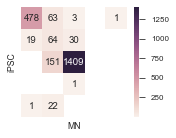

In [14]:
fig, ax = plt.subplots(figsize=(2.5, 2))
sns.heatmap(ipsc_mn_modality_2d, annot=True, fmt='g')
ax.set(xticks=[], yticks=[])
# fig.axes[-1].yaxis.locator_params()
fig.tight_layout()
# fig.savefig('{}/ipsc_to_mn.pdf')

### Get percentages for comparison - use % of events in both

In [15]:
percentages = 100*ipsc_mn_modality_2d/ipsc_mn_modality_2d.sum(axis=1).sum()
percentages

MN,excluded,bimodal,included,middle,uncategorized
iPSC,,,,,
excluded,21.320250,2.809991,0.133809,NaN,0.044603
bimodal,0.847458,2.854594,1.338091,NaN,NaN
included,NaN,6.735058,62.845674,NaN,NaN
middle,NaN,NaN,0.044603,NaN,NaN
uncategorized,0.044603,0.981267,NaN,NaN,NaN


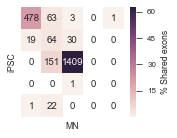

In [16]:
import colorsys

fig, ax = plt.subplots(figsize=(2.5, 2))
sns.heatmap(percentages, cbar_kws=dict(label='% Shared exons'))#, annot=True, fmt='.1f')

# fig.axes[-1].yaxis.locator_params()

raw = ipsc_mn_modality_2d.ix[::-1]

mesh = ax.collections[0]

fmt = 'g'

mesh.update_scalarmappable()
xpos, ypos = np.meshgrid(ax.get_xticks(), ax.get_yticks())
for x, y, percentage, val, color in zip(xpos.flat, ypos.flat, 
                            mesh.get_array(), raw.values.flat, mesh.get_facecolors()):
#     print val
    if percentage is not np.ma.masked:
        _, l, _ = colorsys.rgb_to_hls(*color[:3])
        text_color = ".15" if l > .5 else "w"
        val = ("{:" + fmt + "}").format(val)
        text_kwargs = dict(color=text_color, ha="center", va="center")
#         text_kwargs.update(self.annot_kws)
        ax.text(x, y, val, **text_kwargs)
    else:
        text_kwargs = dict(color='.15', ha="center", va="center")
        ax.text(x, y, 0, **text_kwargs)
ax.set(xticks=[], yticks=[])
fig.tight_layout()
fig.savefig('{}/ipsc_to_mn_modality_heatmap.pdf'.format(folder))

## Barplot of changes to/from bimodal

In [17]:
modality_transitions.head()

,phenotype_x,event_id,modality_x,phenotype_y,modality_y
0,MN,exon:chr10:102114184-102114389:+@exon:chr10:10...,included,MN,included
1,MN,exon:chr10:102114184-102114389:+@exon:chr10:10...,included,NPC,included
2,MN,exon:chr10:102114184-102114389:+@exon:chr10:10...,included,iPSC,included
3,NPC,exon:chr10:102114184-102114389:+@exon:chr10:10...,included,MN,included
4,NPC,exon:chr10:102114184-102114389:+@exon:chr10:10...,included,NPC,included


In [18]:
modality_transitions['transition'] = modality_transitions['phenotype_x'] + '-' + modality_transitions['phenotype_y']
modality_transitions.head()

,phenotype_x,event_id,modality_x,phenotype_y,modality_y,transition
0,MN,exon:chr10:102114184-102114389:+@exon:chr10:10...,included,MN,included,MN-MN
1,MN,exon:chr10:102114184-102114389:+@exon:chr10:10...,included,NPC,included,MN-NPC
2,MN,exon:chr10:102114184-102114389:+@exon:chr10:10...,included,iPSC,included,MN-iPSC
3,NPC,exon:chr10:102114184-102114389:+@exon:chr10:10...,included,MN,included,NPC-MN
4,NPC,exon:chr10:102114184-102114389:+@exon:chr10:10...,included,NPC,included,NPC-NPC


In [24]:
transition_rows = modality_transitions.transition.isin(['iPSC-NPC', 'NPC-MN'])
delta_modality_rows = modality_transitions['modality_x'] != modality_transitions['modality_y']
modality_transitions_subset = modality_transitions.loc[transition_rows & delta_modality_rows]
modality_transitions_subset.head()

,phenotype_x,event_id,modality_x,phenotype_y,modality_y,transition
25,iPSC,exon:chr10:103360960-103361093:+@exon:chr10:10...,excluded,NPC,bimodal,iPSC-NPC
34,iPSC,exon:chr10:103563492-103563776:-@exon:chr10:10...,included,NPC,bimodal,iPSC-NPC
43,iPSC,exon:chr10:103567487-103567658:-@exon:chr10:10...,bimodal,NPC,included,iPSC-NPC
92,iPSC,exon:chr10:104262357-104262466:-@exon:chr10:10...,bimodal,NPC,included,iPSC-NPC
191,iPSC,exon:chr10:112679305-112679415:+@exon:chr10:11...,bimodal,NPC,excluded,iPSC-NPC


In [30]:
delta_modalities = modality_transitions_subset.groupby(['transition', 'modality_x', 'modality_y']).size()
delta_modalities = delta_modalities.reset_index()
delta_modalities = delta_modalities.rename(columns={0: '# AS Exons'})
delta_modalities

,transition,modality_x,modality_y,# AS Exons
0,NPC-MN,bimodal,excluded,27
1,NPC-MN,bimodal,included,32
2,NPC-MN,excluded,bimodal,50
3,NPC-MN,excluded,included,2
4,NPC-MN,excluded,uncategorized,1
5,NPC-MN,included,bimodal,124
6,NPC-MN,uncategorized,bimodal,3
7,iPSC-NPC,bimodal,excluded,47
8,iPSC-NPC,bimodal,included,84
9,iPSC-NPC,excluded,bimodal,113


In [32]:
col = '$\Delta$ Modality'

delta_modalities[col] = 'Other'
delta_modalities.loc[delta_modalities['modality_x'] == 'bimodal', col] = 'Bimodal --> X'
delta_modalities.loc[delta_modalities['modality_y'] == 'bimodal', col] = 'X --> Bimodal'
delta_modalities

,transition,modality_x,modality_y,# AS Exons,$\Delta$ Modality
0,NPC-MN,bimodal,excluded,27,Bimodal --> X
1,NPC-MN,bimodal,included,32,Bimodal --> X
2,NPC-MN,excluded,bimodal,50,X --> Bimodal
3,NPC-MN,excluded,included,2,Other
4,NPC-MN,excluded,uncategorized,1,Other
5,NPC-MN,included,bimodal,124,X --> Bimodal
6,NPC-MN,uncategorized,bimodal,3,X --> Bimodal
7,iPSC-NPC,bimodal,excluded,47,Bimodal --> X
8,iPSC-NPC,bimodal,included,84,Bimodal --> X
9,iPSC-NPC,excluded,bimodal,113,X --> Bimodal


In [46]:
delta_modalities['% Changing AS Exons'] = delta_modalities.groupby('transition')['# AS Exons'].apply(lambda x: 100*x/x.sum())
delta_modalities

,transition,modality_x,modality_y,# AS Exons,$\Delta$ Modality,% Changing AS Exons
0,NPC-MN,bimodal,excluded,27,Bimodal --> X,11.297071
1,NPC-MN,bimodal,included,32,Bimodal --> X,13.389121
2,NPC-MN,excluded,bimodal,50,X --> Bimodal,20.920502
3,NPC-MN,excluded,included,2,Other,0.836820
4,NPC-MN,excluded,uncategorized,1,Other,0.418410
5,NPC-MN,included,bimodal,124,X --> Bimodal,51.882845
6,NPC-MN,uncategorized,bimodal,3,X --> Bimodal,1.255230
7,iPSC-NPC,bimodal,excluded,47,Bimodal --> X,8.785047
8,iPSC-NPC,bimodal,included,84,Bimodal --> X,15.700935
9,iPSC-NPC,excluded,bimodal,113,X --> Bimodal,21.121495


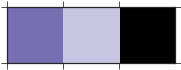

In [53]:
palette = sns.color_palette('Purples_r', n_colors=2) + ['k']
sns.palplot(palette)

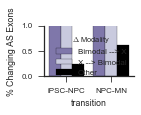

In [54]:
fig, ax = plt.subplots(figsize=(2, 1.5))

sns.barplot(x='transition', y='% Changing AS Exons', palette=palette,
            hue=col, data=delta_modalities, ci=None, order=['iPSC-NPC', 'NPC-MN'])
ax.locator_params('y', nbins=4)
ax.set(ylabel='% Changing AS Exons')

sns.despine()
fig.tight_layout()
fig.savefig('{}/changing_modalities_barplot.pdf'.format(folder))

ax.set(ylim=(0, 1))
ax.legend_.set_visible(False)
fig.savefig('{}/changing_modalities_barplot_zoom.pdf'.format(folder))